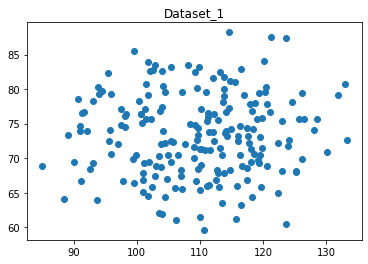

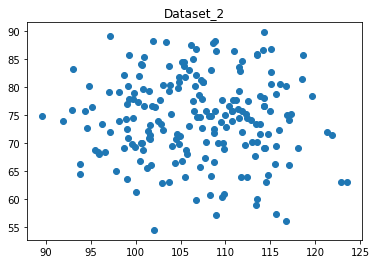

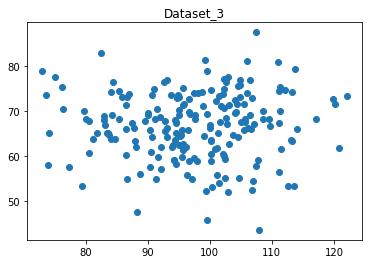

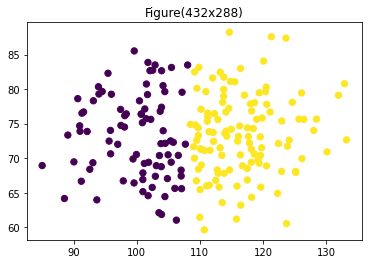

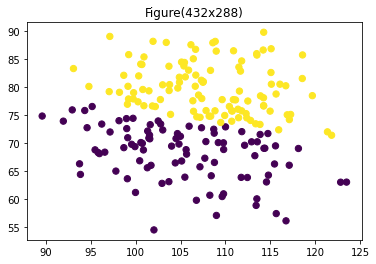

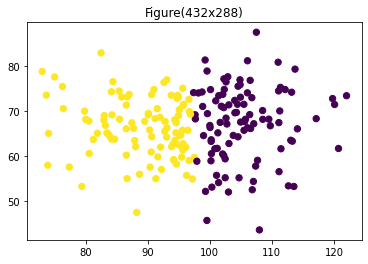

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans


#Works well
def gen_data(mean_1, mean_2, std_1, std_2, nb_X, List_Name):
    List_2D_AB = []
    fig = plt.figure()
    plt.title(str(List_Name))
    A = [random.gauss(mean_1, std_1) for _ in range(nb_X)]
    B = [random.gauss(mean_2, std_2) for _ in range(nb_X)]
    List_2D_AB = np.column_stack((A, B))
    plt.scatter(A, B)
    fig.savefig(str(List_Name) + '_plot.png')
    plt.show()
    return A,B, List_2D_AB
    
#Calling gen_data() function 
A_1, B_1, List_2D_AB_1 = gen_data(110, 73, 10, 6, 200, "Dataset_1")
A_2, B_2, List_2D_AB_2 = gen_data(107, 74, 7, 7, 200, "Dataset_2")
A_3, B_3, List_2D_AB_3 = gen_data(98, 67, 11, 8, 200, "Dataset_3")

#Works well    
def plot_kmeans(Fig_name, List_Name, List_2D_AB, n_clusters=4, rseed=0, ax=None):
    kmeans = KMeans(2, random_state=42)
    labels = kmeans.fit(List_2D_AB).predict(List_2D_AB)
    Fig_name = plt.figure()
    plt.title(str(Fig_name))
    plt.scatter(List_2D_AB[:, 0], List_2D_AB[:, 1], c=labels, s=40, cmap='viridis')
    Fig_name.savefig(str(Fig_name) + '_plot.png')
    plt.show()

#Calling plot_kmeans() function 
plot_kmeans("Fig_1_Kmeans", "List_2D_AB_1", List_2D_AB_1)
plot_kmeans("Fig_2_Kmeans", "List_2D_AB_2", List_2D_AB_2)
plot_kmeans("Fig_2_Kmeans", "List_2D_AB_3", List_2D_AB_3)




In [2]:
np.array(List_2D_AB_1)

array([[102.10311792,  82.67414684],
       [ 92.15999684,  73.86399834],
       [126.10845283,  79.44961261],
       [112.75877874,  68.30710121],
       [ 92.57831689,  68.38822294],
       [113.80382748,  81.72803892],
       [ 99.58033724,  66.40614812],
       [ 95.87365993,  70.62561084],
       [111.27173716,  75.99185988],
       [101.20817239,  69.23447495],
       [114.28021086,  73.17832121],
       [118.20410905,  76.82892167],
       [126.16644327,  69.92720986],
       [124.15202438,  72.60556258],
       [109.14766405,  69.98697802],
       [ 88.56272078,  64.15411691],
       [104.19192044,  73.97040831],
       [125.18607393,  67.93438002],
       [126.46107593,  75.61999765],
       [121.31802547,  87.58997477],
       [109.1673211 ,  82.48748673],
       [113.6245538 ,  78.09544423],
       [ 91.3302401 ,  76.51168933],
       [112.51895005,  66.79651161],
       [ 97.00338079,  72.00563947],
       [121.12871514,  76.68180768],
       [ 99.95506816,  70.52888703],
 

In [42]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


def elbow_approach(list1):
    # clustering dataset
# determine k using elbow method: to determine the ideal val of :NUMBER OF CLUSTERS:
    
    plot_kmeans("Fig_1_Kmeans", "List_2D_AB_1", List_2D_AB_1)

    X=np.array(list1)

    # k means determine k
    distortions = []
    dist_points_from_cluster_center = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
        dist_points_from_cluster_center.append(kmeanModel.inertia_)
    print(len(dist_points_from_cluster_center))
    print("distortions:",len(distortions))

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    
    plt.plot(K, dist_points_from_cluster_center)
    plt.plot([K[0], K[8]], [dist_points_from_cluster_center[0], 
                            dist_points_from_cluster_center[8]], 'ro-')
    plt.show()
    
    x = [K[0], K[8]]
    y = [dist_points_from_cluster_center[0], dist_points_from_cluster_center[8]]

    # Calculate the coefficients. This line answers the initial question. 
    coefficients = np.polyfit(x, y, 1)

    # Print the findings
    print( 'a =', coefficients[0])
    print ('b =', coefficients[1])

    # Let's compute the values of the line...
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(0,9,100)
    y_axis = polynomial(x_axis)

    # ...and plot the points and the line
    plt.plot(x_axis, y_axis)
    plt.grid('on')
    plt.show()
    
    a = dist_points_from_cluster_center[0] - dist_points_from_cluster_center[8]
    b = K[8] - K[0]
    c1 = K[0] * dist_points_from_cluster_center[8]
    c2 = K[8] * dist_points_from_cluster_center[0]
    c = c1 - c2

    import math
    distance_of_points_from_line = []
    for k in range(9):
      distance_of_points_from_line.append(
          calc_distance(K[k], dist_points_from_cluster_center[k], a, b, c))
    
    plt.plot(K, distance_of_points_from_line)
    
    print("automatically selecting ideal value of K!",K[np.argmax(distance_of_points_from_line)])
    
    return K[np.argmax(distance_of_points_from_line)]
    



    return distortions

def plot_kmeans_elbow(k,Fig_name, List_Name, List_2D_AB, n_clusters=4, rseed=0, ax=None):
    kmeans = KMeans(k, random_state=42)
    labels = kmeans.fit(List_2D_AB).predict(List_2D_AB)
    Fig_name = plt.figure()
    plt.title(str(Fig_name))
    plt.scatter(List_2D_AB[:, 0], List_2D_AB[:, 1], c=labels, s=40, cmap='viridis')
    Fig_name.savefig(str(Fig_name) + '_plot.png')
    plt.show()
    
def calc_distance(x1, y1, a, b, c):
  d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
  return d


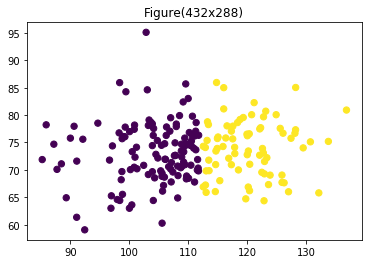

9
distortions: 9


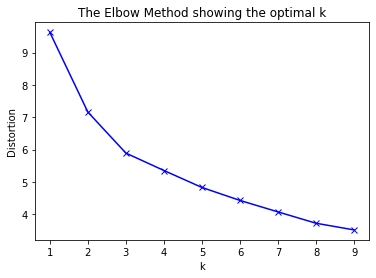

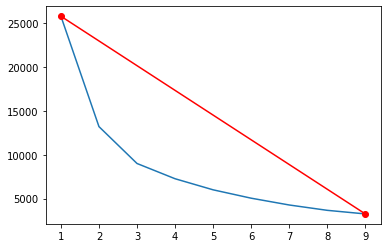

a = -2820.3502350224226
b = 28633.81606259819


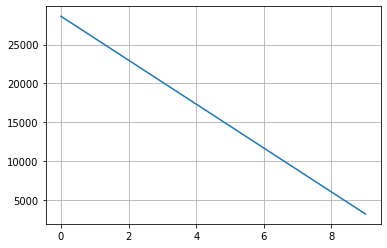

automatically selecting ideal value of K! 3


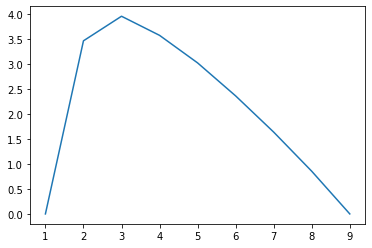

In [44]:
k_ideal=elbow_approach(List_2D_AB_1)

In [ ]:
input_zip=[AB123]  # V1
suggested_zip=[AB2345,DC567,]   #V2

PCA=[]

pca_variance =x%
pca1

In [ ]:
bokeh =v1 45 dim 
v2 45 dim

In [ ]:
33000 

In [ ]:
3000*33000

In [46]:
k_ideal

3

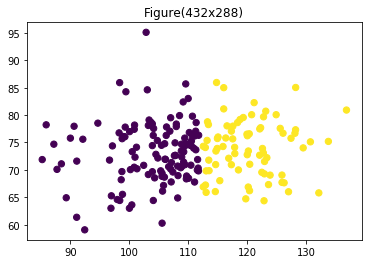

9
distortions: 9


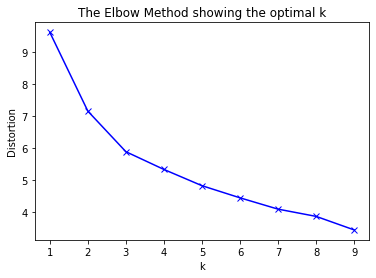

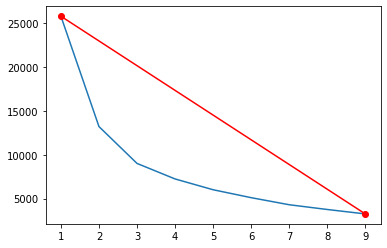

a = -2821.560298678984
b = 28635.026126254746


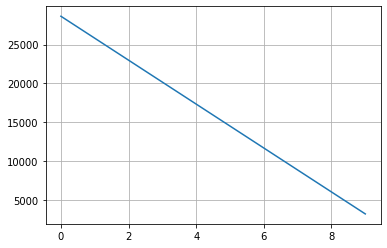

automatically selecting ideal value of K! 3


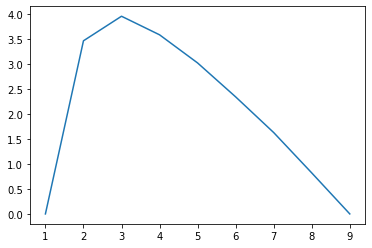

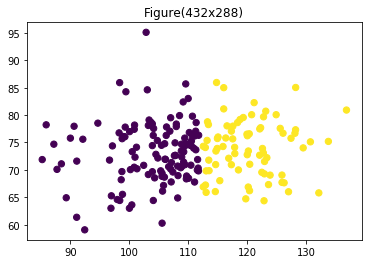

In [49]:
plot_kmeans("Fig_1_Kmeans_elbow", "List_2D_AB_1", List_2D_AB_1, n_clusters=elbow_approach(List_2D_AB_1))

In [ ]:
#Kmeans with n_clusters parameter from the elbow and knne approaches
#plot_kmeans("Fig_1_Kmeans_elbow", "List_2D_AB_1", List_2D_AB_1, n_clusters=NB_clusters_Elbow_D1)
#plot_kmeans("Fig_1_Kmeans_knee", "List_2D_AB_1", List_2D_AB_1, n_clusters=NB_clusters_Knee_D1)

#DBscan with n_clusters parameter from the elbow and knne approaches
#plot_DBscan("Fig_1_Kmeans", "List_2D_AB_1", List_2D_AB_1, n_clusters=NB_clusters_Elbow_D1)
#plot_DBscan("Fig_1_Kmeans", "List_2D_AB_1", List_2D_AB_1, n_clusters=NB_clusters_Knee_D1)

#And for ALL clustering techniques mentioned in the paper

#To be developed
def Kmeans_PSO():

#To be developed
def Kmeans_GA():

    


In [51]:
!pip install ga

  Stored in directory: C:\Users\7314315\AppData\Local\pip\Cache\wheels\56\ff\65\35d92ba6660c3514a2a85b085a85fdfb9ea7a8080166be2eeb
Successfully built ga


In [52]:
import numpy
import ga

"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = 6

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

num_generations = 5
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measing the fitness of each chromosome in the population.
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)

    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = ga.mutation(offspring_crossover)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

[[-2.21475946 -1.03302071 -2.6900976  -3.96318159 -2.5460303  -1.99344323]
 [ 3.67178244  1.83897017  3.2762833  -3.61330852  0.76096811 -3.38256267]
 [-1.91386756  1.72511821 -0.62482057 -2.9570861   0.83877273 -0.02993934]
 [-1.43379295 -0.44568445  3.66945028  0.7122313   1.20296562 -3.15826073]
 [-2.85790811  0.96508535  1.19184204 -0.64321922 -3.25121728 -0.93883716]
 [ 0.84729927 -2.20816744 -1.96400877 -0.71831095 -1.19801947 -0.81769285]
 [-0.71711086 -1.00194317  3.01749948 -1.18756258 -0.10146018 -1.42149713]
 [-2.59416418 -0.78656513  1.50946878  0.54688529  1.56222703 -2.12119097]]
Generation :  0


AttributeError: module 'ga' has no attribute 'cal_pop_fitness'